# Imports

In [1]:
%load_ext autoreload

In [3]:
%autoreload 2
from src import *
import numpy as np

# Signal

In [91]:
dim = (128,128)

# Sparse signal parameters
sparse_range = (0, 6)
density = 0.005

# Smooth signal parameters
smooth_amplitude = 2
sigmas_range = (2e-2, 2e-1)
nb_gaussian = int(0.5*dim[0])

# Seed
seed = 42

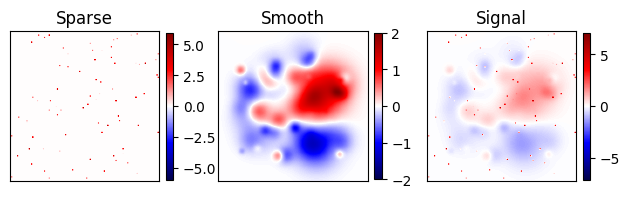

In [92]:
sparse_signal = compute_sparse(dim, sparse_range, density, seed)
smooth_signal = compute_smooth(dim, smooth_amplitude, sigmas_range, nb_gaussian, seed)

signal = sparse_signal + smooth_signal 
plot_signal(sparse_signal,smooth_signal)

# Operator $\phi$

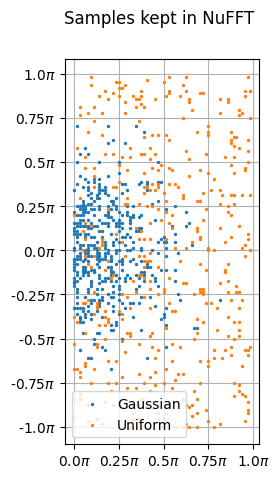

In [93]:
L = 0.1
theta = 0.5
op = NuFFT(dim, L, theta, on_grid=True)

x0 = signal.reshape(-1)
y0 = op(x0)
op.plot_samples()

pnsr = 50
y = compute_y(y0, pnsr)

# Solver

In [94]:
from pyxu.operator import Laplacian

# Loss weights
lambda1 = 0.2
lambda2 = 0.4

x1,x2 = coupled_solve(y, op, lambda1, lambda2, Laplacian(dim))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyxu/abc/arithmetic.py:639: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t2 = float(self._op.apply(self._cst))


INFO -- [2023-10-23 00:06:29.910896] Iteration 0
	iteration: 0
	RelError[x]: 0.0
INFO -- [2023-10-23 00:06:33.340822] Iteration 100
	iteration: 100
	RelError[x]: 0.003239454528782038
INFO -- [2023-10-23 00:06:36.845751] Iteration 200
	iteration: 200
	RelError[x]: 0.0051506180135360595
INFO -- [2023-10-23 00:06:40.339863] Iteration 300
	iteration: 300
	RelError[x]: 0.007122858521228519
INFO -- [2023-10-23 00:06:43.487415] Iteration 400
	iteration: 400
	RelError[x]: 0.007526335318522702
INFO -- [2023-10-23 00:06:46.807616] Iteration 500
	iteration: 500
	RelError[x]: 0.0041428453548939875
INFO -- [2023-10-23 00:06:50.376003] Iteration 600
	iteration: 600
	RelError[x]: 0.002663913249430485
INFO -- [2023-10-23 00:06:53.801665] Iteration 700
	iteration: 700
	RelError[x]: 0.0020325136568076527
INFO -- [2023-10-23 00:06:57.263570] Iteration 800
	iteration: 800
	RelError[x]: 0.0016043347744365104
INFO -- [2023-10-23 00:07:01.390513] Iteration 900
	iteration: 900
	RelError[x]: 0.0012231450407123

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x14effb100>


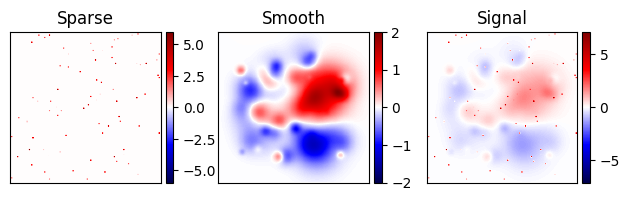

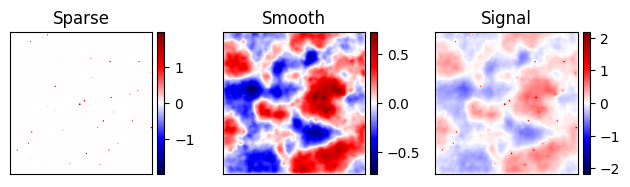

0.7121216610534241 0.00040967239567157144


In [100]:
sparse_rcstr, smooth_rcstr, signal_rcstr = map(
    lambda x: x.reshape(dim), (x1, x2, x1 + x2)
)

plot_signal(sparse_signal, smooth_signal)
plot_signal(sparse_rcstr, smooth_rcstr)

print(nmse(signal,signal_rcstr), wasserstein_dist(signal,signal_rcstr))